Instalar Librerias


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, welch
import pygame
import sys

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


Cargar datos EEG

In [3]:
def cargar_datos(csv_path):
    df = pd.read_csv(csv_path)
    tiempo = df['timestamp'].values  # columna de tiempo
    señal = df['eeg'].values         # columna de señal EEG
    return tiempo, señal

Filtro pasa banda

In [4]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [5]:
def aplicar_filtro(señal, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    return lfilter(b, a, señal)

Visualización de la señal

In [6]:
def graficar_senal(tiempo, señal_filtrada, titulo="Señal Filtrada"):
    plt.figure(figsize=(12, 4))
    plt.plot(tiempo, señal_filtrada, color='royalblue')
    plt.title(titulo)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.show()

Calcular potencia en la banda de interés

In [7]:
def calcular_potencia_banda(señal, fs):
    frecs, psd = welch(señal, fs=fs, nperseg=fs*2)
    alpha_band = (frecs >= 8) & (frecs <= 12)
    alpha_power = np.sum(psd[alpha_band])
    return alpha_power

Acción visual con pygame

In [8]:
def iniciar_pygame():
    pygame.init()
    ventana = pygame.display.set_mode((600, 400))
    pygame.display.set_caption("Simulación BCI")
    return ventana

In [9]:
def ejecutar_visualizacion(ventana, activo):
    color = (0, 255, 0) if activo else (255, 0, 0)
    ventana.fill(color)
    pygame.display.flip()

Main

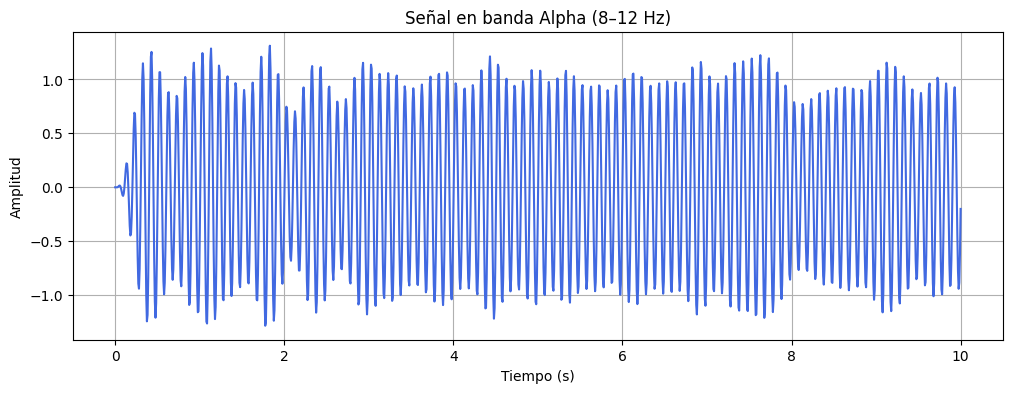

Potencia en banda Alpha: 1.06


SystemExit: 

/var/data/python/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3678: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
def main():
    # Configuración
    ruta_csv = 'datos_eeg.csv'  # tu archivo .csv
    fs = 128  # frecuencia de muestreo en Hz
    umbral_alpha = 20  # umbral artificial de potencia

    tiempo, señal = cargar_datos(ruta_csv)
    señal_alpha = aplicar_filtro(señal, 8, 12, fs)
    graficar_senal(tiempo, señal_alpha, "Señal en banda Alpha (8–12 Hz)")

    potencia_alpha = calcular_potencia_banda(señal_alpha, fs)
    print(f"Potencia en banda Alpha: {potencia_alpha:.2f}")

    # Condición de activación
    activo = potencia_alpha > umbral_alpha

    # Visualización pygame
    ventana = iniciar_pygame()
    ejecutar_visualizacion(ventana, activo)

    # Esperar hasta cerrar
    while True:
        for evento in pygame.event.get():
            if evento.type == pygame.QUIT:
                pygame.quit()
                sys.exit()

if __name__ == '__main__':
    main()